# Task One *

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#---------------------------------------------------------------------------------------------
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
#---------------------------------------------------------------------------------------------
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
#---------------------------------------------------------------------------------------------
import xgboost as xgb
import warnings
#---------------------------------------------------------------------------------------------
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
# Getting Data
df = pd.read_csv("HTRU_2.csv", header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
0    17898 non-null float64
1    17898 non-null float64
2    17898 non-null float64
3    17898 non-null float64
4    17898 non-null float64
5    17898 non-null float64
6    17898 non-null float64
7    17898 non-null float64
8    17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


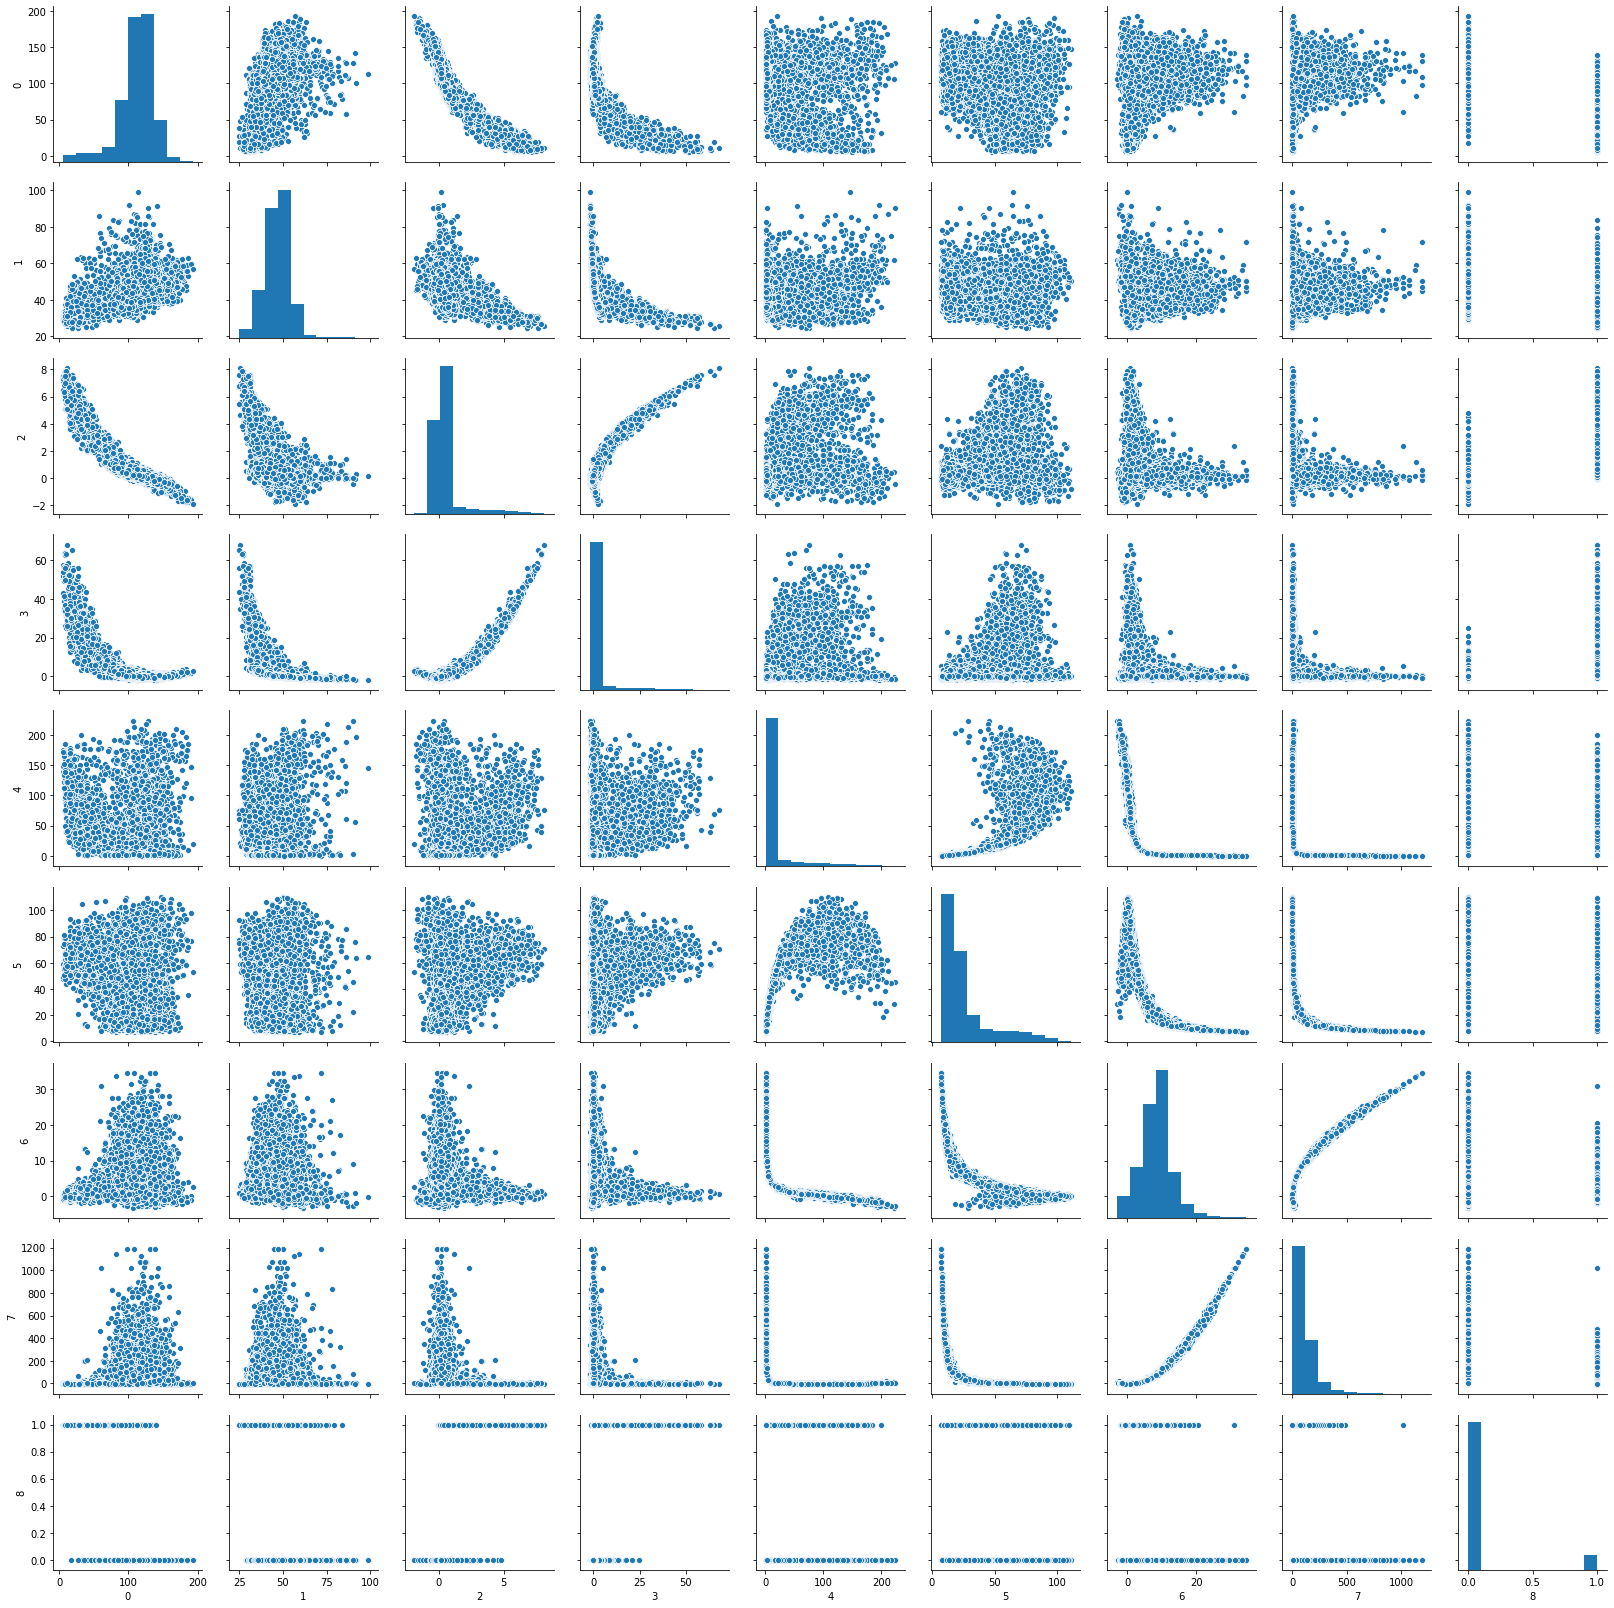

In [6]:
sns.pairplot(df)

In [7]:
X = df.drop(8, axis=1)
y = df[8]

In [8]:
X

,0,1,2,3,4,5,6,7
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


In [9]:
y

0        0
1        0
2        0
3        0
4        0
        ..
17893    0
17894    0
17895    0
17896    0
17897    0
Name: 8, Length: 17898, dtype: int64

In [10]:
df[8].value_counts()

0    16259
1     1639
Name: 8, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print('Train set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Train set: X=(14318, 8), y=(14318,)
Test set: X=(3580, 8), y=(3580,)


In [12]:
# Training 
model = XGBClassifier(seed=42,
                      n_estimators=100,
                      max_depth=6,
                      learning_rate=0.3)
model.fit(X_train, y_train)
#---------------------------------------------------------------------------------------------
y_pred_train = model.predict(X_train)
print (metrics.classification_report(y_train, y_pred_train))
#---------------------------------------------------------------------------------------------
y_pred_test = model.predict(X_test)
print (metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13000
           1       1.00      0.99      0.99      1318

    accuracy                           1.00     14318
   macro avg       1.00      0.99      1.00     14318
weighted avg       1.00      1.00      1.00     14318

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.92      0.86      0.89       321

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



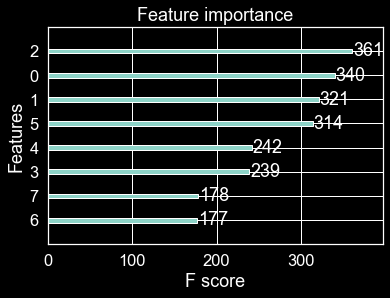

In [13]:
sns.set(font_scale = 1.5)
plt.style.use('dark_background')
xgb.plot_importance(model);

In [14]:
print(f"Accuracy:  {accuracy_score(y_test, model.predict(X_test))}")
print(f"Precision: {precision_score(y_test, model.predict(X_test), average='weighted')}")
print(f"Recall:    {recall_score(y_test, model.predict(X_test), average='weighted')}")

Accuracy:  0.9807262569832402
Precision: 0.9803204459851143
Recall:    0.9807262569832402


In [15]:
# GridSearchCV
model = XGBClassifier()
#---------------------------------------------------------------------------------------------
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.05, 0.1, 0.5]
max_depth = [3, 4, 6]
#---------------------------------------------------------------------------------------------
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth = max_depth)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
#---------------------------------------------------------------------------------------------
grid_search = GridSearchCV(model, param_grid, scoring="f1", cv=kfold, verbose=2, n_jobs=-1)
grid_res = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  6.8min finished


In [16]:
grid_res.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}

In [17]:
grid_res.best_score_

0.8867530541364496